In [1]:

import random
import numpy as np
import xobjects as xo
import xcoll as xc

from xcoll.geometry.segments import get_max_crossings
from xcoll.geometry.trajectories import DriftTrajectory
from xcoll.geometry.c_init import GeomCInit, McsLineParams
import matplotlib.pyplot as plt
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets

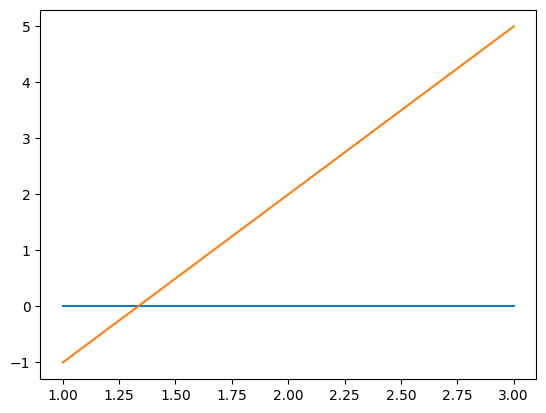

In [3]:
s1 = 1.0
x1 = -1.0
s2 = 2.0
x2 = 2.0

s_test = np.linspace(1.0, 3.0, 1000)
Xo = 0.1193
Ax = (random.gauss()/np.sqrt(12) + random.gauss()/2) * Xo * 13.6e-3 / 7e3 * 0.038
y = Ax * np.sqrt(s_test/Xo)**3.0 * (1.0/0.038 + np.log(s_test/Xo))
line = x1 + (x2 - x1) / (s2 - s1) * (s_test - s1)

plt.figure(2)
plt.plot(s_test, y)
plt.plot(s_test, line)
plt.show()

In [8]:
# def check_grid_and_newton(Xo, Ax, points, traj_id=0, seg_id=0):
#     params = McsLineParams(Xo=Xo, Ax=Ax, s1=points[0], x1=points[1], s2=points[2], x2=points[3])
#     max_crossings = 2
#     roots = np.zeros(max_crossings, dtype=np.float64)
#     number_of_roots = np.zeros(1, dtype=np.int8)
#     GeomCInit.grid_search_and_newton(traj_id=0, seg_id=0, s_min=0, s_max=1, roots=roots, params=params,
#                                     max_crossings=max_crossings, number_of_roots=number_of_roots)

In [4]:
points = np.array([1, -1, 2, 2], dtype=np.float64)
params = McsLineParams(Xo=Xo, Ax=Ax, s1=points[0], x1=points[1], s2=points[2], x2=points[3])
max_crossings = 2
roots = np.zeros(max_crossings, dtype=np.float64)
number_of_roots = np.zeros(1, dtype=np.int8)
test = GeomCInit(traj_id=0, seg_id=0, s_min=0, s_max=1, roots=roots, params=params,
                                    max_crossings=max_crossings, number_of_roots=number_of_roots)

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
L = 0.6  # Length in meters
Xo = 0.052  # Radiation length in meters
Pc = 5.0  # Momentum in GeV

# Define the number of steps and number of particles
NUM_STEPS = 100
NUM_PARTICLES = 500000

class LocalParticle:
    def __init__(self, x, xp, y, yp, s):
        self.x = x
        self.xp = xp
        self.y = y
        self.yp = yp
        self.s = s

    def set_x(self, x):
        self.x = x

    def set_y(self, y):
        self.y = y

    def set_xp_yp(self, xp, yp):
        self.xp = xp
        self.yp = yp

    def add_to_s(self, s):
        self.s += s

def scamcs(part, x0, xp0, s):
    # Calculate the new x and xp using the provided equations
    ss = np.sqrt(s / Xo)
    z1 = np.random.normal(0, 1)
    z2 = np.random.normal(0, 1)
    x_new = x0 + s * (xp0 + 0.5 * ss * (z2 + z1 * 0.577350269))
    xp_new = xp0 + ss * z2
    return x_new, xp_new

def perform_mcs(part, length, num_steps):
    step_length = length / num_steps
    for _ in range(num_steps):
        x_new, xp_new = scamcs(part, part.x, part.xp, step_length)
        part.set_x(x_new)
        part.set_xp_yp(xp_new, part.yp)
        part.add_to_s(step_length)

# Initialize particles
particles_single_step = [LocalParticle(x=0, xp=0, y=0, yp=0, s=0) for _ in range(NUM_PARTICLES)]
particles_multi_step = [LocalParticle(x=0, xp=0, y=0, yp=0, s=0) for _ in range(NUM_PARTICLES)]

# Perform MCS for a single step
for particle in particles_single_step:
    perform_mcs(particle, L, 1)

# Perform MCS for 20 steps
for particle in particles_multi_step:
    perform_mcs(particle, L, NUM_STEPS)

# Extract final positions and angles
x_single = [particle.x for particle in particles_single_step]
xp_single = [particle.xp for particle in particles_single_step]
x_multi = [particle.x for particle in particles_multi_step]
xp_multi = [particle.xp for particle in particles_multi_step]



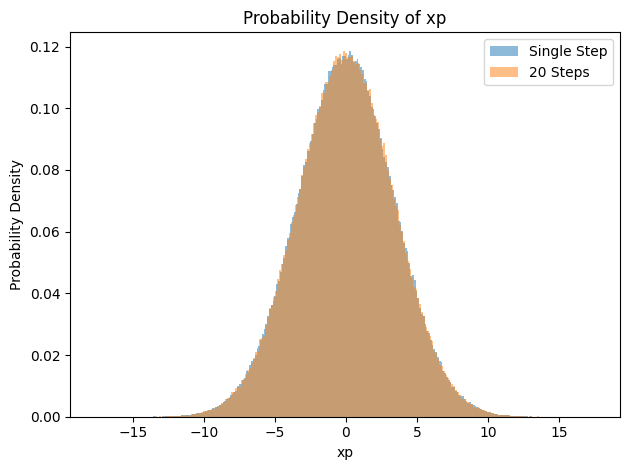

In [ ]:
# Plot xp distribution
plt.hist(xp_single, bins=250, density=True, alpha=0.5, label='Single Step')
plt.hist(xp_multi, bins=250, density=True, alpha=0.5, label='20 Steps')


plt.xlabel('xp')
plt.ylabel('Probability Density')
plt.title('Probability Density of xp')
plt.legend()

plt.tight_layout()

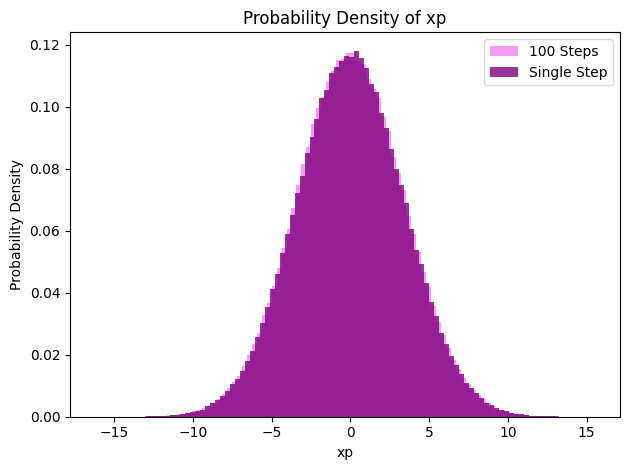

In [85]:
plt.hist(xp_multi, bins=100, alpha=0.8, label=f'{NUM_STEPS} Steps', color='violet', density=True)
plt.hist(xp_single, bins=100,alpha=0.8, label='Single Step', color='purple', density=True)


plt.xlabel('xp')
plt.ylabel('Probability Density')
plt.title('Probability Density of xp')
plt.legend()

plt.tight_layout()
plt.show()

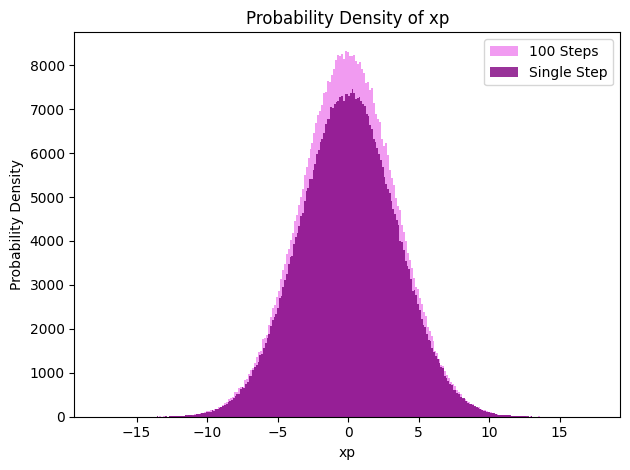

In [79]:
# Plot the results

# Plot xp distribution
# plt.subplot(1, 2, 2)
plt.hist(xp_multi, bins=250, alpha=0.8, label=f'{NUM_STEPS} Steps', color='violet')
plt.hist(xp_single, bins=250,alpha=0.8, label='Single Step', color='purple')


plt.xlabel('xp')
plt.ylabel('Probability Density')
plt.title('Probability Density of xp')
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
test.grid_search_and_newton(traj_id=0, seg_id=0, s_min=1, s_max=2, roots=roots, params=params, 
                            max_crossings=max_crossings, number_of_roots=number_of_roots)

Compiling ContextCpu kernels...


737b67f1e9924a8a8a08165e437bcb74.c:953:33: error: unknown type name 'LineSegment'
  953 | void LineSegment_crossing_drift(LineSegment seg, int8_t* n_hit, double* s, double s0, double x0, double xm){
      |                                 ^~~~~~~~~~~
737b67f1e9924a8a8a08165e437bcb74.c:1015:31: error: unknown type name 'LineSegment'
 1015 | void LineSegment_crossing_mcs(LineSegment seg, int8_t* n_hit, double* s, const double* Ax, const double Xo, void* params){
      |                               ^~~~~~~~~~~
737b67f1e9924a8a8a08165e437bcb74.c:1051:41: error: unknown type name 'HalfOpenLineSegment'
 1051 | void HalfOpenLineSegment_crossing_drift(HalfOpenLineSegment seg, int8_t* n_hit, double* s, double s0, double x0, double xm){
      |                                         ^~~~~~~~~~~~~~~~~~~
737b67f1e9924a8a8a08165e437bcb74.c:1082:47: error: unknown type name 'McsHalfOpenLineParams'
 1082 | double MultipleCoulomb_HalfOpenLine(double s, McsHalfOpenLineParams params){
      |        

VerificationError: CompileError: command '/home/ssolstra/miniforge3/envs/xsuite/bin/x86_64-conda-linux-gnu-cc' failed with exit code 1

In [ ]:

# check_grid_and_newton(Xo, Ax, points)   
print('Roots:', roots)

AttributeError: type object 'GeomCInit' has no attribute 'grid_search_and_newton'

In [2]:
def check_drift(shape, plot_object=False, xlim=(-0.5, 1.5), ylim=(-0.5, 1.5)):
    to_remove = []
    s_val = np.linspace(*xlim, 200)
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    if plot_object:
        shape.plot(axes=ax)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect('equal')

    n_hit = np.zeros(1, dtype=np.int8)
    s = np.zeros(get_max_crossings(shape, DriftTrajectory), dtype=np.float64)
    # s = np.zeros(8, dtype=np.float64)

    def update_plot(s0, x0, part_theta):
        # Clean the previous trajectory and points
        while to_remove:
            last_point = to_remove.pop()  # Get the last added point
            last_point.remove()
        m = np.tan(np.radians(part_theta))
        # Draw drift trajectory and point
        spread = 10 # degrees
        line, = ax.plot(s_val, m*(s_val - s0) + x0, c='k')
        to_remove.append(line)
        scatter = ax.scatter(s0, x0, c='r', s=20)
        to_remove.append(scatter)
        m1 = np.tan(np.radians(part_theta+spread))
        m2 = np.tan(np.radians(part_theta-spread))
        line = ax.fill_between(s_val, m1*(s_val - s0) + x0, m2*(s_val - s0) + x0, alpha=0.2)
        to_remove.append(line)
        # Create hits for different slopes (small cone around the trajectory)
        hits_s = []
        hits_x = []
        for sp in np.linspace(-spread, spread, 100):
            n_hit[0] = 0
            m = np.tan(np.radians(part_theta + sp))
            if isinstance(shape, xc.Shape2DV):
                shape.crossing_drift(n_hit=n_hit, s=s, s0=s0, x0=x0, xm=m, y0=0, ym=0)
            else:
                shape.crossing_drift(n_hit=n_hit, s=s, s0=s0, x0=x0, xm=m)
            hits_s += list(s[:n_hit[0]])
            hits_x += list(x0 + m*(s[:n_hit[0]] - s0))
        # for i in range(n_hit[0]):
        scatter = ax.scatter(hits_s, hits_x, c='g', s=5)
        # to_remove.append(scatter)
        fig.canvas.draw()  # Redraw the canvas to show the new point


    def onclick(event):
        s0, x0 = event.xdata, event.ydata
        if s0 is not None and x0 is not None:  # Ensure the click is inside the plot
            update_plot(s0, x0, part_theta_slider.value)


    fig.canvas.mpl_connect('button_press_event', onclick)
    part_theta_slider = widgets.IntSlider(min=-89, max=89, step=1, value=0)

    @interact(part_theta=part_theta_slider)
    def check_linesegments(part_theta):
        if to_remove:
            scatter = to_remove[1]  # The second point is the clicked scatter point
            s0, x0 = scatter.get_offsets()[0, 0], scatter.get_offsets()[0, 1]

            # Update the plot with the new slope based on the slider
            update_plot(s0, x0, part_theta)

In [38]:
shape1 = xc.Shape2D([xc.LineSegment(s1=0, x1=0, s2=0.2, x2=1), xc.LineSegment(s1=0.2, x1=1, s2=1, x2=1),
                     xc.LineSegment(s1=1, x1=1, s2=0.8, x2=0), xc.LineSegment(s1=0.8, x1=0, s2=0, x2=0)])
shape2 = xc.Shape2D([xc.LineSegment(s1=0, x1=0, s2=0.2, x2=1),
                     xc.BezierSegment(s1=0.2, x1=1, s2=1+0.5*np.cos(3*np.pi/4), x2=0.5+0.5*np.sin(3*np.pi/4), cs1=0.5, cx1=2.5, cs2=1+0.5*np.cos(3*np.pi/4)-0.6, cx2=0.5+0.5*np.sin(3*np.pi/4)-0.6),
                     xc.CircularSegment(R=0.5, s=1, x=0.5, t1=-np.pi/2, t2=3*np.pi/4),
                     xc.LineSegment(s1=1, x1=0, s2=0, x2=0),
                     xc.HalfOpenLineSegment(s=2, x=1, t=np.pi/4),
                     xc.LineSegment(s1=2, x1=1, s2=3, x2=0),
                     xc.HalfOpenLineSegment(s=3, x=0, t=np.pi/4)])
shape3 = xc.Shape2DV([xc.LineSegment(s1=0, x1=0, s2=0.2, x2=1),
                      xc.BezierSegment(s1=0.2, x1=1, s2=1+0.5*np.cos(3*np.pi/4), x2=0.5+0.5*np.sin(3*np.pi/4), cs1=0.5, cx1=2.5, cs2=1+0.5*np.cos(3*np.pi/4)-0.6, cx2=0.5+0.5*np.sin(3*np.pi/4)-0.6),
                      xc.CircularSegment(R=0.5, s=1, x=0.5, t1=-np.pi/2, t2=3*np.pi/4),
                      xc.LineSegment(s1=1, x1=0, s2=0, x2=0),
                      xc.HalfOpenLineSegment(s=2, x=1, t=np.pi/4),
                      xc.LineSegment(s1=2, x1=1, s2=3, x2=0),
                      xc.HalfOpenLineSegment(s=3, x=0, t=np.pi/4),
                      xc.HalfOpenLineSegment(s=1.8, x=-0.5, t=5*np.pi/8),
                      xc.CircularSegment(R=0.3, s=1.8-0.3*np.cos(np.pi/8), x=-0.5-0.3*np.sin(np.pi/8), t1=-7*np.pi/8, t2=np.pi/8),
                      xc.HalfOpenLineSegment(s=1.8-0.6*np.cos(np.pi/8), x=-0.5-0.6*np.sin(np.pi/8), t=5*np.pi/8)],
                     vlimit=[-0.1, 0.1])
shape4 = xc.Shape2DV([xc.CircularSegment(R=1, s=0, x=0, t1=0, t2=2*np.pi/3),
                      xc.CircularSegment(R=1, s=0, x=0, t1=2*np.pi/3, t2=4*np.pi/3),
                      xc.CircularSegment(R=1, s=0, x=0, t1=4*np.pi/3, t2=2*np.pi)],
                     vlimit=[-0.1, 0.1])
R1 = 0.5
R2 = 2
t = np.arcsin(R1/R2)
shape5 = xc.Shape2D([xc.CircularSegment(R=R1, s=0, x=0, t1=np.pi/2, t2=-np.pi/2),
                     xc.CircularSegment(R=R2, s=-R2*np.cos(t), x=0, t1=-t, t2=t)])
shape6 = xc.Shape2D([xc.HalfOpenLineSegment(s=0, x=0, t=np.pi/4),
                     xc.HalfOpenLineSegment(s=0, x=0, t=-np.pi/4)])

In [39]:
shape1.crossing_drift

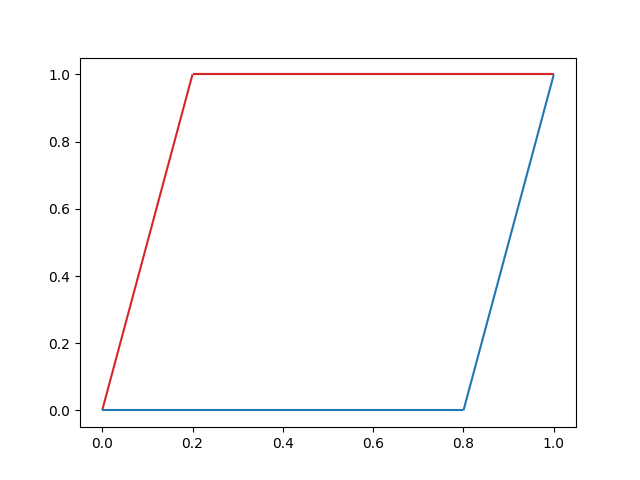

ShapeMalformedError: Vertex (0.2, 1.0) connected to more than 2 segments: {0, 1, 2}!
0: LineSegment((0.0, 0.0) -- (0.2, 1.0))
1: LineSegment((0.2, 1.0) -- (1.0, 1.0))
2: LineSegment((0.2, 1.0) -- (1.0, 1.0))
3: LineSegment((1.0, 1.0) -- (0.8, 0.0))
4: LineSegment((0.8, 0.0) -- (0.0, 0.0))

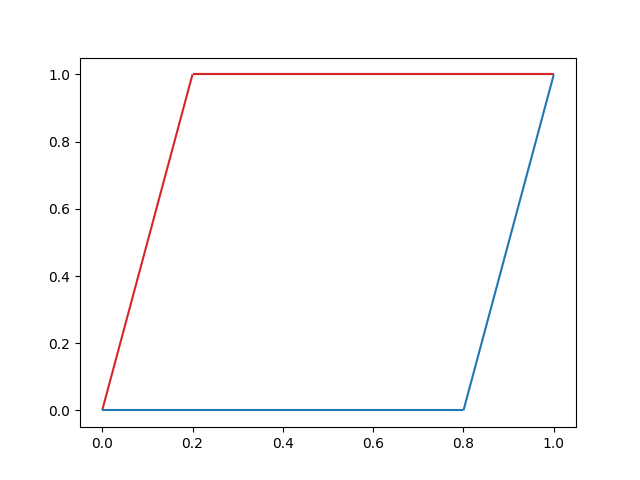

In [4]:
#This is meant to fail

xc.Shape2D([xc.LineSegment(s1=0, x1=0, s2=0.2, x2=1), xc.LineSegment(s1=0.2, x1=1, s2=1, x2=1), xc.LineSegment(s1=0.2, x1=1, s2=1, x2=1),
            xc.LineSegment(s1=1, x1=1, s2=0.8, x2=0), xc.LineSegment(s1=0.8, x1=0, s2=0, x2=0)]).get_vertices()

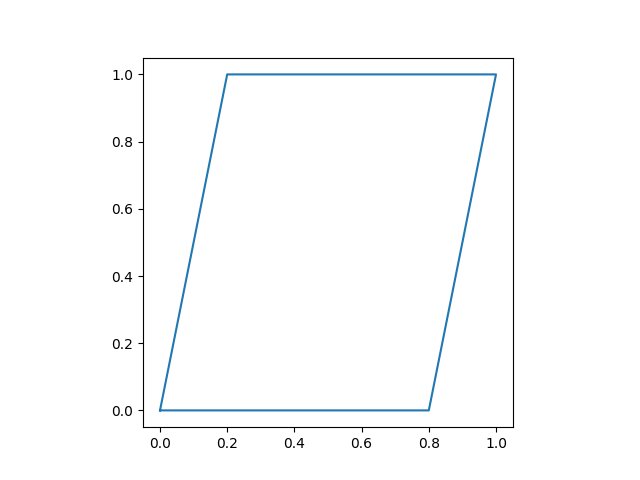

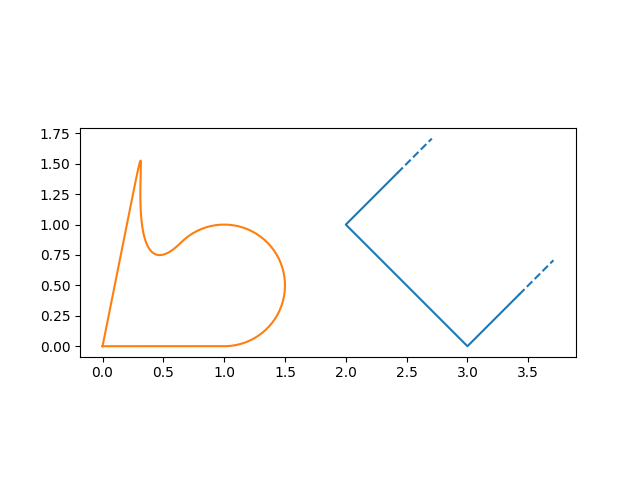

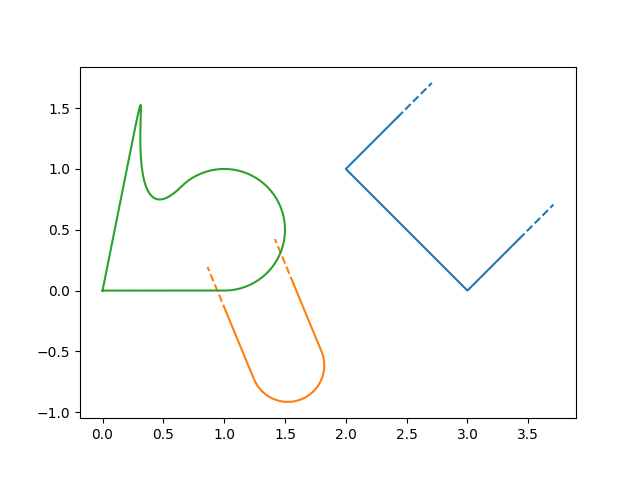

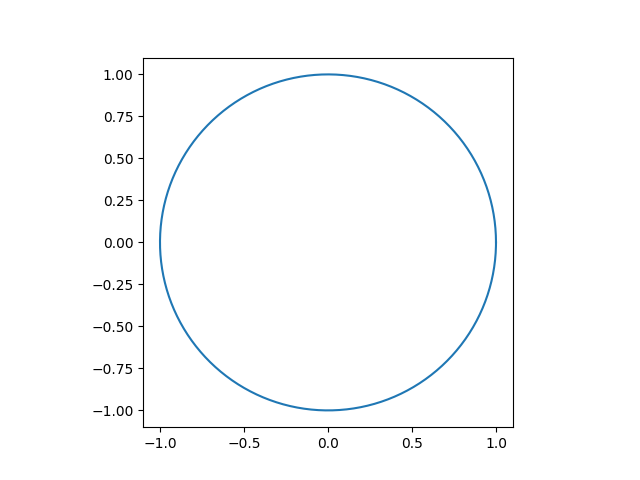

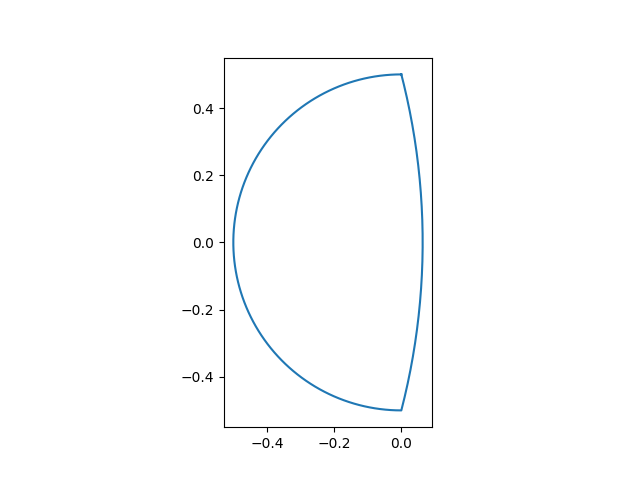

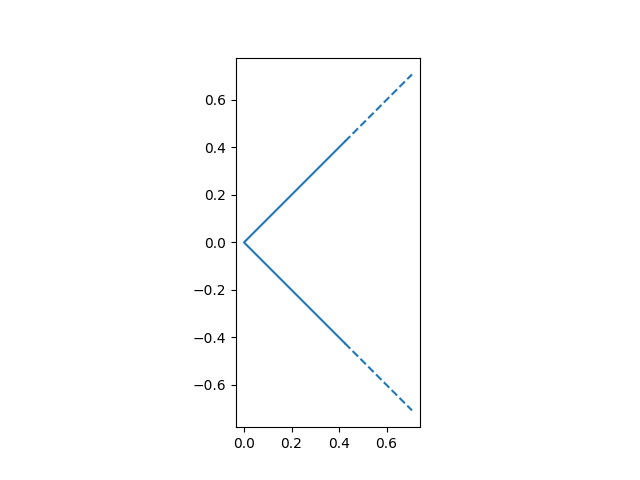

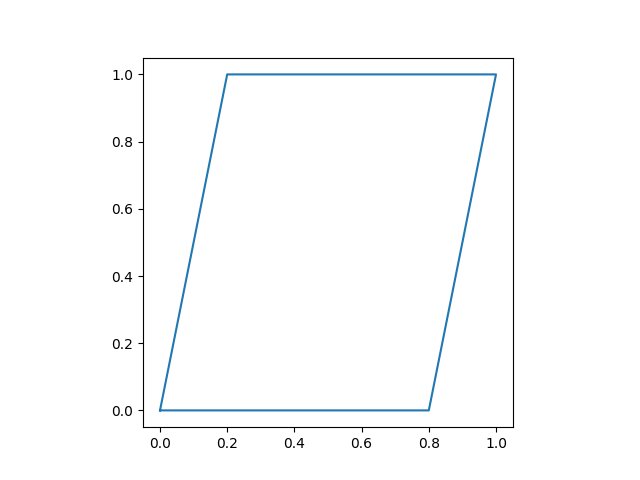

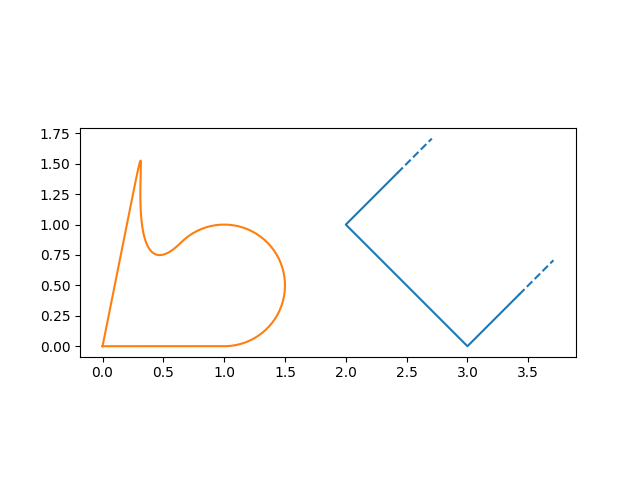

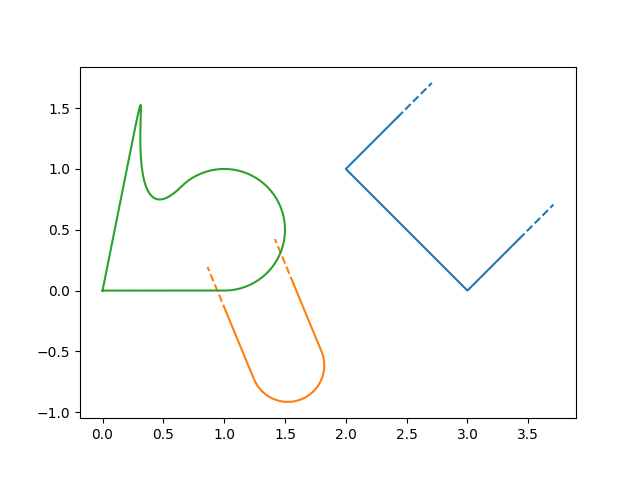

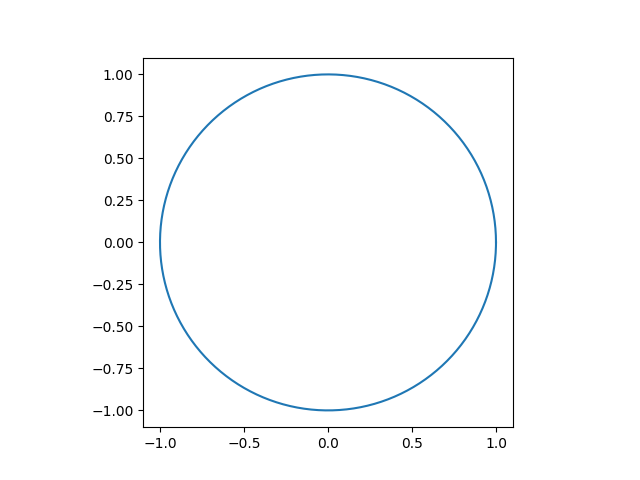

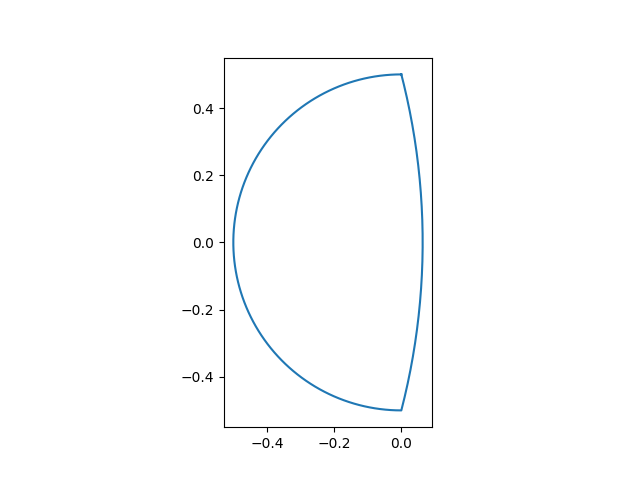

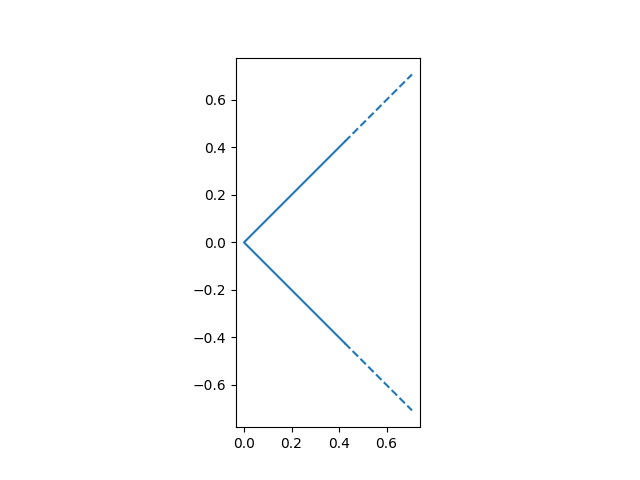

In [5]:
fig, _ = shape1.plot(); fig.show()
fig, _ = shape2.plot(); fig.show()
fig, _ = shape3.plot(); fig.show()
fig, _ = shape4.plot(); fig.show()
fig, _ = shape5.plot(); fig.show()
fig, _ = shape6.plot(); fig.show()

In [ ]:
fig, _ = shape1.plot3d(); fig.show()
fig, _ = shape2.plot3d(); fig.show()
fig, _ = shape3.plot3d(); fig.show()
fig, _ = shape4.plot3d(); fig.show()
fig, _ = shape5.plot3d(); fig.show()
fig, _ = shape6.plot3d(); fig.show()

In [ ]:
shape_1 = xc.Shape2D([xc.LineSegment(s1=0, x1=0, s2=0.2, x2=1), xc.LineSegment(s1=0.2, x1=1, s2=1, x2=1),
                     xc.LineSegment(s1=1, x1=1, s2=0.8, x2=0), xc.LineSegment(s1=0.8, x1=0, s2=0, x2=0)])

check_drift(shape_1, plot_object=False)

In [ ]:
shape_2 = xc.Shape2D([xc.LineSegment(s1=0, x1=0, s2=0.2, x2=1),
                     xc.BezierSegment(s1=0.2, x1=1, s2=1+0.5*np.cos(3*np.pi/4), x2=0.5+0.5*np.sin(3*np.pi/4), cs1=0.5, cx1=2.5, cs2=1+0.5*np.cos(3*np.pi/4)-0.6, cx2=0.5+0.5*np.sin(3*np.pi/4)-0.6),
                     xc.CircularSegment(R=0.5, s=1, x=0.5, t1=-np.pi/2, t2=3*np.pi/4),
                     xc.LineSegment(s1=1, x1=0, s2=0, x2=0),
                     xc.HalfOpenLineSegment(s=2, x=1, t=np.pi/4),
                     xc.LineSegment(s1=2, x1=1, s2=3, x2=0),
                     xc.HalfOpenLineSegment(s=3, x=0, t=np.pi/4)])
check_drift(shape_2, xlim=(-0.5, 4), ylim=(-0.5,2), plot_object=True)

In [ ]:
# seg = xc.CircularSegment(R=1, s=0., x=0., t1=0,        t2=np.pi/2)
# seg = xc.CircularSegment(R=1, s=0., x=0., t1=-np.pi/2, t2=np.pi/2)
# seg = xc.CircularSegment(R=1, s=0., x=0., t1=np.pi/2,  t2=-np.pi/2)
# seg = xc.CircularSegment(R=1, s=0., x=0., t1=0,        t2=3*np.pi/2)
# seg = xc.CircularSegment(R=1, s=0., x=0., t1=0,        t2=2*np.pi)
# seg = xc.CircularSegment(R=1, s=0., x=0., t1=0,        t2=-np.pi/2)
# seg = xc.CircularSegment(R=1, s=0., x=0., t1=-np.pi/2, t2=0)
seg = xc.CircularSegment(R=1, s=0., x=0., t1=3*np.pi/2,t2=0)

check_drift(xc.Shape2D([seg]), plot_object=True, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))

In [ ]:
shape_3 = xc.Shape2DV([xc.LineSegment(s1=0, x1=0, s2=0.2, x2=1),
                      xc.BezierSegment(s1=0.2, x1=1, s2=1+0.5*np.cos(3*np.pi/4), x2=0.5+0.5*np.sin(3*np.pi/4), cs1=0.5, cx1=2.5, cs2=1+0.5*np.cos(3*np.pi/4)-0.6, cx2=0.5+0.5*np.sin(3*np.pi/4)-0.6),
                      xc.CircularSegment(R=0.5, s=1, x=0.5, t1=-np.pi/2, t2=3*np.pi/4),
                      xc.LineSegment(s1=1, x1=0, s2=0, x2=0),
                      xc.HalfOpenLineSegment(s=2, x=1, t=np.pi/4),
                      xc.LineSegment(s1=2, x1=1, s2=3, x2=0),
                      xc.HalfOpenLineSegment(s=3, x=0, t=np.pi/4)],
                    vlimit=[-0.1, 0.1])
check_drift(shape_3, xlim=(-0.5, 4), ylim=(-0.5,2), plot_object=True)